<a href="https://colab.research.google.com/github/mgamzec/GeoPython/blob/main/ipygee_geehydro_ndvi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geemap

In [ ]:
import ee

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=3Bpruu3mLPZagJTZjP178L46zofTHHhziWRCpkWB_gY&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWijcVLGlXXsp185h8ItjW15kVTtnZ2U3zq_ymauEbeXYQl7cjCvA9s

Successfully saved authorization token.


In [ ]:
# Installs geemap package
import google.colab
import geemap.eefolium as geemap

In [ ]:
import ee
import geemap

try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()


In [ ]:
wdpa_polygon = ee.FeatureCollection('WCMC/WDPA/current/polygons')
# select the pa in cambodia
als = wdpa_polygon.filter(ee.Filter.eq('NAME', 'Ang Trapeng Thmor'))



In [ ]:
#d=ee.ImageCollection("NASA/MEASURES/GFCC/TC/v3").filter(ee.Filter.date('2015-01-01', '2015-07-31'))

modis = ee.ImageCollection('MODIS/006/MOD13Q1')
modis = modis.filterDate(ee.DateRange('2017-01-01','2019-12-01'))
ndvi = modis.select('NDVI') ##select band

Apply scale factor

In [ ]:
def scale_factor(image):
# scale factor for the MODIS MOD13Q1 product
  return image.multiply(0.0001).copyProperties(image,
                                             ['system:time_start'])
# mapping function to multiply by the scale factor

scaled_ndvi = ndvi.map(scale_factor)

In [ ]:
ndviCoverVis = {
  'min': 0,
  'max': 1,
  'palette': ['red', 'yellow','green'],
}

In [ ]:
map4 = geemap.Map(center=[12.5657, 105],zoom=5)
map4.add_basemap('SATELLITE')
map4.addLayer(scaled_ndvi.mean().clip(als), ndviCoverVis, 'NDVI')
map4.addLayer(als,{},'PA')
map4.addLayerControl()
map4

Map(center=[12.5657, 105], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(childre…

In [ ]:
!pip install ipygee

     |████████████████████████████████| 127 kB 18.5 MB/s 
     |████████████████████████████████| 74 kB 3.3 MB/s 
  Created wheel for ipygee: filename=ipygee-0.0.17-py3-none-any.whl size=40380 sha256=040457424125c2e30ab6141738be07f364f61335ee2eb95e6ed4184d9a3f467a
  Stored in directory: /root/.cache/pip/wheels/73/af/7e/a9d3fac7d32e649c63fdbdb9b320181b20eb4bfdc80af13974
  Created wheel for geetools: filename=geetools-0.6.14-py3-none-any.whl size=92105 sha256=9c58c0eb0c158d9c7dd2dc64c203d7341f7a3e2d9940be65d59f8aec73c7e439
  Stored in directory: /root/.cache/pip/wheels/5c/55/29/0a09dcf6b39bba8c890e40171cac3e3607a5c4b354b7e9447c
Successfully built ipygee geetools


In [ ]:
!pip install -U proplot

     |████████████████████████████████| 8.0 MB 10.1 MB/s 


In [ ]:
!pip install geehydro

  Created wheel for geehydro: filename=geehydro-0.2.0-py2.py3-none-any.whl size=10141 sha256=39dcc0592aad44a8ed65be2d3c2c88109e716d94d6ed85a977d58e56819a769f
  Stored in directory: /root/.cache/pip/wheels/49/6c/92/019aeb37663078e6666afa9dd336e2d8df72d5683d7d357697
Successfully built geehydro


In [ ]:
import ee
import folium
import geehydro
import numpy as np # yes, numpy!
import pandas as pd # yes, pandas!
import proplot as plot
import matplotlib.pyplot as plt
from ipygee import*
from pandas.plotting import register_matplotlib_converters

/usr/local/lib/python3.7/dist-packages/proplot/__init__.py:71: ProPlotWarning: Rebuilding font cache. This usually happens after installing or updating proplot.
  register_fonts(default=True)


In [ ]:
als_ndvi = chart.Image.series(**{'imageCollection': scaled_ndvi,
                                   'region': als,
                                   'reducer': ee.Reducer.mean(),
                                   'scale': 1000,
                                   'xProperty': 'system:time_start'})
als_ndvi.renderWidget(width='50%')

HTML(value='<embed src=data:image/svg+xml;charset=utf-8;base64,PD94bWwgdmVyc2lvbj0nMS4wJyBlbmNvZGluZz0ndXRmLTg…

In [ ]:
import pandas as pd


In [ ]:
df =als_ndvi.dataframe


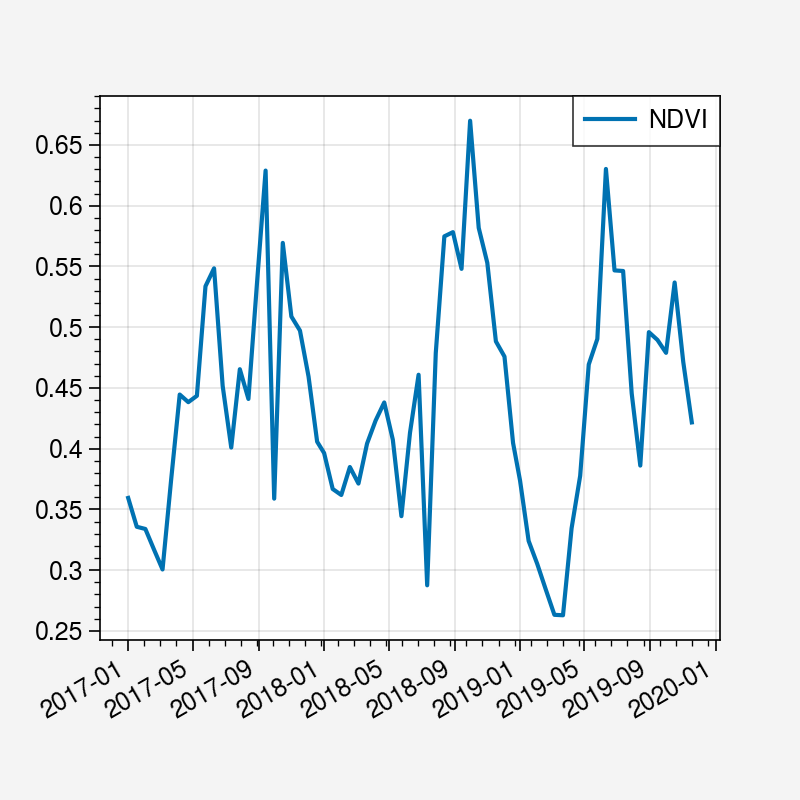

In [ ]:
import matplotlib
%matplotlib inline

#plot the data in desired chart
df.plot.line()
